<a href="https://colab.research.google.com/github/Jaehoonang/study/blob/main/Using_surprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163470 sha256=f0486ba51beea4d8eff577d33d621dd36b83b70e9c44e5e6af0f98fa3e0b49c1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
import numpy as np
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt
data = Dataset.load_builtin(name=u'ml-100k')

# train test 분리
trainset, testset = train_test_split(data, test_size=0.25)

algo = KNNWithMeans()

algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9544


0.9543802118772859

In [10]:
sim_options = {'name':'pearson_baseline',
               'user_based':True}

algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9453


0.9452985244128846

Estimating biases using als...
RMSE: 0.9468
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9544
RMSE: 0.9396
RMSE: 0.9204


array([0.92040894, 0.93960748, 0.94684088, 0.95438021])

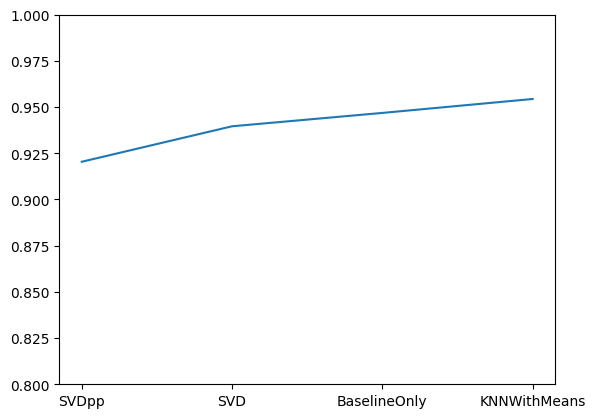

In [8]:
algorithms =[BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []

for option in algorithms:
  algo = option()
  names.append(option.__name__)
  algo.fit(trainset)
  predictions = algo.test(testset)
  results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]